In [23]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,matthews_corrcoef, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.preprocessing import StandardScaler

from itertools import product

In [2]:
pd.set_option('display.max_columns', 100) # replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 100) # replace n with the number of rows you want to see completely

In [3]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')
# Grab a peak at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Count the occurrences of fraud and no fraud and print them
occ = data['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Print the ratio of fraud cases
ratio_cases = occ/len(data.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}')
print(f'Natural Hit Rate: {1 - ratio_cases[1]}')

Ratio of fraudulent cases: 0.001727485630620034
Natural Hit Rate: 0.9982725143693799


In [8]:
# Define the scaler and apply to the data
scaler = StandardScaler()
temp = data['Amount']
data['Amount'] = scaler.fit_transform(temp.values.reshape(-1, 1))

In [9]:
# Dividing the X(features) and the Y(target) from the dataset
X = data.drop(["Class", "Time"], axis=1).values
Y = data["Class"].values
print(f'X shape: {X.shape}\nY shape: {Y.shape}')

X shape: (284807, 29)
Y shape: (284807,)


In [10]:
# Define the resampling method
resampling = SMOTE()
# Create the resampled feature set
X_resampled, Y_resampled = resampling.fit_sample(X, Y)

In [ ]:
# First, try models without SMOTE

In [11]:
# Create the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_resampled_train, X_resampled_test, Y_resampled_train, Y_resampled_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=0)

In [20]:
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [21]:
def evaluate(model_name, actual, prediction):
    print("the Model used is {}".format(model_name))
    acc = accuracy_score(actual, prediction)
    print("The accuracy is {}".format(acc))
    prec = precision_score(actual, prediction)
    print("The precision is {}".format(prec))
    rec = recall_score(actual, prediction)
    print("The recall is {}".format(rec))
    f1 = f1_score(actual, prediction)
    print("The F1-Score is {}".format(f1))
    mcc = matthews_corrcoef(actual, prediction)
    print("The Matthews correlation coefficient is {}".format(mcc))
    # Print the classifcation report and confusion matrix
    print("Classification report:\n", classification_report(actual, prediction))
    conf_mat = confusion_matrix(y_true=actual, y_pred=prediction)
    print("Confusion matrix:\n", conf_mat)
    plot_confusion_matrix(conf_mat)

In [13]:
def eval_roc(model, x_test, y_test):
    # Predict probabilities
    probs = model.predict_proba(x_test)
    # Print the ROC curve
    print('ROC Score:')
    print(roc_auc_score(y_test, probs[:,1]))

In [ ]:
# Logistic Regression

In [ ]:
# Fit a logistic regression model to original data
lr = LogisticRegression(solver='sag')
lr.fit(X_train, Y_train)
# Obtain model predictions
lr_predicted = lr.predict(X_test)
evaluate("Logistic Regression", Y_test, lr_predicted)

In [ ]:
# Fit a logistic regression model to resampled data
lr = LogisticRegression(solver='sag')
lr.fit(X_resampled_train, Y_resampled_train)
# Obtain model predictions
lr_predicted = lr.predict(X_resampled_test)
evaluate("Logistic Regression", Y_resampled_test, lr_predicted)

In [ ]:
# ROC score of logistic regression
eval_roc(lr, X_resampled_test, Y_resampled_test)

In [ ]:
# Random Forest

the Model used is Random Forest
The accuracy is 0.9995084442259752
The precision is 0.9411764705882353
The recall is 0.7619047619047619
The F1-Score is 0.8421052631578947
The Matthews correlation coefficient is 0.8465796445342841
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     7]
 [   35   112]]
Confusion matrix, without normalization


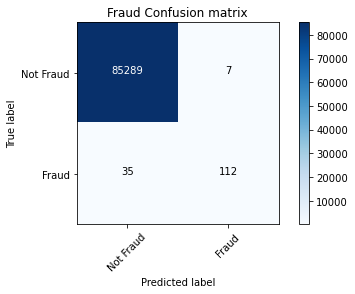

In [29]:
# Define the model as the random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
# predictions
rf_predicted = rf.predict(X_test)
evaluate("Random Forest", Y_test, rf_predicted)

In [17]:
# Define the model as the random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_resampled_train,Y_resampled_train)
# predictions
rf_predicted = rf.predict(X_resampled_test)
evaluate("Random Forest", Y_resampled_test, rf_predicted)

the Model used is Random Forest
The accuracy is 0.9998886211889395
The precision is 0.999777611311391
The recall is 1.0
The F1-Score is 0.9998887932901384
The Matthews correlation coefficient is 0.9997772666522077
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion matrix:
 [[85153    19]
 [    0 85417]]


In [ ]:
# ROC score of Random Forest
eval_roc(rf, X_resampled_test, Y_resampled_test)

In [ ]:
# Artificial Neural Network

In [1]:
# Define the model as ANN
ann = MLPClassifier(random_state=0, hidden_layer_sizes=(100,))
ann.fit(X_train,Y_train)
# predictions
ann_predicted = ann.predict(X_test)
evaluate("Artificial Neural Network", Y_test, ann_predicted)

NameError: name 'MLPClassifier' is not defined

the Model used is Artificial Neural Network
The accuracy is 0.9997948285059411
The precision is 0.9995904133314609
The recall is 1.0
The F1-Score is 0.9997951647168298
The Matthews correlation coefficient is 0.9995897400802409
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion matrix:
 [[85137    35]
 [    0 85417]]
Confusion matrix, without normalization


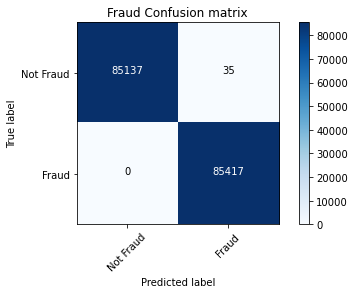

In [25]:
# Define the model as ANN
ann = MLPClassifier(random_state=0, hidden_layer_sizes=(100, 100))
ann.fit(X_resampled_train,Y_resampled_train)
# predictions
ann_predicted = ann.predict(X_resampled_test)
evaluate("Artificial Neural Network", Y_resampled_test, ann_predicted)

the Model used is Artificial Neural Network
The accuracy is 0.9996600015241311
The precision is 0.9993214390172566
The recall is 1.0
The F1-Score is 0.9996606043583083
The Matthews correlation coefficient is 0.9993202320237495
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion matrix:
 [[85114    58]
 [    0 85417]]
Confusion matrix, without normalization


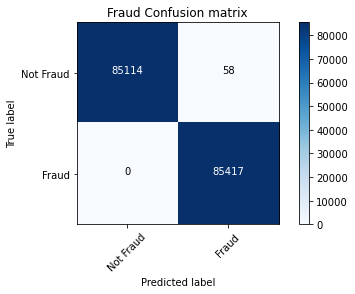

In [27]:
# Define the model as ANN
ann = MLPClassifier(random_state=0, hidden_layer_sizes=(200,))
ann.fit(X_resampled_train,Y_resampled_train)
# predictions
ann_predicted = ann.predict(X_resampled_test)
evaluate("Artificial Neural Network", Y_resampled_test, ann_predicted)

In [ ]:
# ROC score of ANN
eval_roc(ann, X_resampled_test, Y_resampled_test)

In [ ]:
# Ensemble Method

In [ ]:
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('ann', ann)], voting='soft', weights=[0, 5, 5], flatten_transform=True)
ensemble_model.fit(X_resampled_train,Y_resampled_train)
# predictions
ensemble_model_predicted = ensemble_model.predict(X_resampled_test)
evaluate("Ensemble Model", Y_resampled_test, ensemble_model_predicted)

In [18]:
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('ann', ann)], voting='soft', weights=[1, 1], flatten_transform=True)
ensemble_model.fit(X_resampled_train,Y_resampled_train)
# predictions
ensemble_model_predicted = ensemble_model.predict(X_resampled_test)
evaluate("Ensemble Model", Y_resampled_test, ensemble_model_predicted)

the Model used is Ensemble Model
The accuracy is 0.9998241387193781
The precision is 0.9996489051692862
The recall is 1.0
The F1-Score is 0.9998244217623372
The Matthews correlation coefficient is 0.9996483383685428
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion matrix:
 [[85142    30]
 [    0 85417]]
